In [3]:
import pandas as pd
import numpy as np
import mplfinance as mpf
import functools
from datetime import datetime

In [4]:
ticker = 'SPLK'
support_threshold = -0.03

df = pd.read_csv('../stock_data/raw_history_yahoo/'+ticker+'.csv', index_col=0, parse_dates=True)

In [5]:
df['AllTimeHigh'] = df['High'].cummax()
df['CloseChange'] = df['Close'].pct_change()
df['LowChange'] = (df['Low'] / df['Low'].shift(1) - 1).clip(upper=0)
df['LowChangeCum'] = df['LowChange'].rolling(5).apply(lambda w: functools.reduce((lambda x,y: 0 if y == 0 else x + y), w))
df['NewSupport'] = (df['LowChangeCum'] < support_threshold) & (df['LowChangeCum'].shift(-1) == 0)
df['Support'] = np.where(df['NewSupport'],df['Low'],np.NaN)
df['Support'].ffill(inplace=True)

In [6]:
df.loc['2010':'2020'].tail(30)

,Open,High,Low,Close,Adj Close,Volume,AllTimeHigh,CloseChange,LowChange,LowChangeCum,NewSupport,Support
Date,,,,,,,,,,,,
2020-06-18,184.500000,186.979996,183.639999,186.199997,186.199997,1029400,192.750000,0.013113,0.000000,0.000000,False,173.500000
2020-06-19,188.000000,189.940002,185.250000,187.160004,187.160004,1936400,192.750000,0.005156,0.000000,0.000000,False,173.500000
2020-06-22,191.000000,196.320007,190.229996,193.089996,193.089996,2244500,196.320007,0.031684,0.000000,0.000000,False,173.500000
2020-06-23,195.210007,197.220001,192.160004,193.080002,193.080002,1569900,197.220001,-0.000052,0.000000,0.000000,False,173.500000
2020-06-24,193.039993,195.339996,188.330002,190.610001,190.610001,1774300,197.220001,-0.012793,-0.019931,-0.019931,False,173.500000
2020-06-25,191.809998,194.160004,189.000000,193.039993,193.039993,821000,197.220001,0.012749,0.000000,0.000000,False,173.500000
2020-06-26,193.660004,197.699997,190.169998,196.800003,196.800003,3419900,197.699997,0.019478,0.000000,0.000000,False,173.500000
2020-06-29,198.960007,198.960007,190.990005,194.500000,194.500000,1777300,198.960007,-0.011687,0.000000,0.000000,False,173.500000
2020-06-30,194.919998,199.320007,194.190002,198.699997,198.699997,2095700,199.320007,0.021594,0.000000,0.000000,False,173.500000


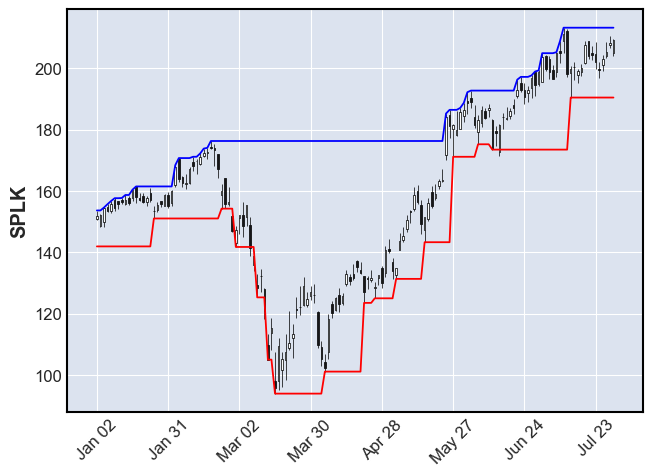

In [7]:
dfplot = df2010 = df.loc['2020']
apdict = [
    mpf.make_addplot(dfplot['AllTimeHigh'], color='b'),
    mpf.make_addplot(dfplot['Support'], color='r'),]
mpf.plot(dfplot, type='candle', ylabel=ticker, addplot=apdict)